In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import copy

In [2]:
data = pd.read_csv('processed.cleveland.data', 
                   names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
                  )
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [4]:
np.sum(data == '?')

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [5]:
data = data.replace('?', np.nan)

In [6]:
data.fillna(data.median())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
# NAN_rows_indices = list(np.where(data == '?')[0])
# NAN_rows = data.iloc[NAN_rows_indices]
# data = data.drop(NAN_rows_indices)

In [8]:
data['ca'] = pd.to_numeric(data['ca'])
data['thal'] = pd.to_numeric(data['thal'])

In [9]:
def one_hot_categories(data, categories):
    for category in categories:
        one_hot = pd.get_dummies(data[category], prefix=category)
        data = data.drop(category, axis=1)
        data = data.join(one_hot)
    return data

In [10]:
data = one_hot_categories(data, ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [11]:
data['num'][data['num'] > 0] = 1

<ipython-input-11-f729322243a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num'][data['num'] > 0] = 1


In [12]:
data = data.sample(frac=1)

In [13]:
data_test = data[:50]
data_train = data[50:]

y_test = data_test['num']
X_test = data_test.drop(columns=['num'])

y_train = data_train['num']
X_train = data_train.drop(columns=['num'])

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)

X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

In [14]:
# class DimReduction(nn.Module):
#     def __init__(self, down_layer_sizes, up_layer_sizes):
#         super().__init__()
#         self.down_layers = nn.ModuleList([])
#         self.up_layers = nn.ModuleList([])
        
#         for i in range(1, len(down_layer_sizes)):
#             self.down_layers.append(nn.Linear(down_layer_sizes[i-1], down_layer_sizes[i]))
            
#         for i in range(1, len(up_layer_sizes)):
#             self.up_layers.append(nn.Linear(up_layer_sizes[i-1], up_layer_sizes[i]))
        
#     def forward(self, x):
#         out = x
#         for i in range(len(self.down_layers)):
#             out = nn.functional.relu(self.down_layers[i](out))
        
#         for i in range(len(self.up_layers)-1):
#             out = nn.functional.relu(self.up_layers[i](out))
        
#         out = self.up_layers[-1](out)
#         return out
    
#     def reduce_dim(self, x):
#         out = x
        
#         for i in range(len(self.down_layers) - 1):
#             out = nn.functional.relu(self.down_layers[i](out))
            
#         out = self.down_layers[-1](out)
#         return out
    
# num_epochs = 2000
# batch_size = 16
# n_total_steps = len(X_train) // batch_size
# learning_rate = 0.001

# model = DimReduction([X_train.shape[1], 64, 32, 24], [24, 32, 64, X_train.shape[1]])
# loss_fn = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# for epoch in range(num_epochs):
#     X_train = X_train[torch.randperm(X_train.size()[0])]
#     for step in range(n_total_steps):
#         input_ = X_train[step*batch_size : (step+1)*batch_size]
#         output = model(input_)
#         loss = loss_fn(output, input_)
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         if (epoch+1)%10 == 0:
#             print(f'epoch {epoch+1} / {num_epochs}, loss = {loss.item():.4f}', end='\r')
            
            
# with torch.no_grad():
#     X_train_reduced = model.reduce_dim(X_train)
#     X_test_reduced = model.reduce_dim(X_test)

In [15]:
class Classifier(nn.Module):
    def __init__(self, layer_sizes):
        super().__init__()
        self.linear_layers = nn.ModuleList([])
        for i in range(1, len(layer_sizes)):
            self.linear_layers.append(nn.Linear(layer_sizes[i-1], layer_sizes[i]))
        
    def forward(self, x):
        out = x
        for i in range(len(self.linear_layers)-1):
            out = nn.functional.relu(self.linear_layers[i](out))
        
        out = self.linear_layers[-1](out)
        out = torch.sigmoid(out)
        return out

In [16]:
num_epochs = 500
batch_size = 16
n_total_steps = len(X_train) // batch_size
learning_rate = 0.001

In [17]:
classifier = Classifier([X_train.shape[1], 16, 8, 4, 1])
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

In [18]:
train_losses = []
test_losses = []
test_accuracies = []
old_test_accuracy = 0
for epoch in range(num_epochs):
    train_loss = 0
    for step in range(n_total_steps):
        input_ = X_train[step*batch_size : (step+1)*batch_size]
        output = classifier(input_)
        loss = loss_fn(output.flatten(), y_train[step*batch_size : (step+1)*batch_size])
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss = train_loss/n_total_steps
    train_losses.append(train_loss)
            
    with torch.no_grad():
        y_hat = classifier(X_test)
        test_loss = loss_fn(y_hat.flatten(), y_test)
        test_losses.append(test_loss)
        test_accuracy = torch.sum(np.round(y_hat.flatten()) == y_test).item() * 100/len(y_test)
        test_accuracies.append(test_accuracy)
        
    if (epoch + 1) % 10 == 0:
        print(f'epoch {epoch+1} / {num_epochs}, training loss = {train_loss:.4f}, test loss = {test_loss.item():.4f}, test accuracy = {test_accuracy:.4f}')
        
    if test_accuracy >= old_test_accuracy:
        old_test_accuracy = test_accuracy
        best_model_state_dict = copy.deepcopy(classifier.state_dict())

epoch 10 / 500, training loss = 0.6311, test loss = 0.6174, test accuracy = 60.0000
epoch 20 / 500, training loss = 0.5917, test loss = 0.5849, test accuracy = 72.0000
epoch 30 / 500, training loss = 0.5548, test loss = 0.5600, test accuracy = 74.0000
epoch 40 / 500, training loss = 0.5194, test loss = 0.5285, test accuracy = 80.0000
epoch 50 / 500, training loss = 0.4786, test loss = 0.4914, test accuracy = 88.0000
epoch 60 / 500, training loss = 0.4535, test loss = 0.4808, test accuracy = 84.0000
epoch 70 / 500, training loss = 0.4297, test loss = 0.4745, test accuracy = 84.0000
epoch 80 / 500, training loss = 0.4046, test loss = 0.4648, test accuracy = 86.0000
epoch 90 / 500, training loss = 0.3918, test loss = 0.4628, test accuracy = 84.0000
epoch 100 / 500, training loss = 0.3856, test loss = 0.4646, test accuracy = 84.0000
epoch 110 / 500, training loss = 0.3684, test loss = 0.4609, test accuracy = 84.0000
epoch 120 / 500, training loss = 0.3586, test loss = 0.4673, test accuracy

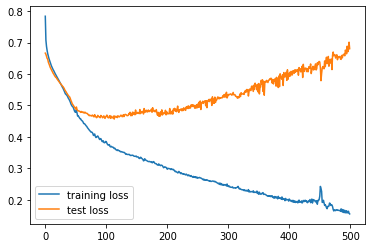

In [19]:
plt.plot(train_losses, label="training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

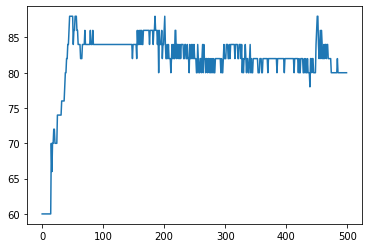

In [20]:
plt.plot(test_accuracies)
plt.show()

In [23]:
best_model = Classifier([X_test.shape[1], 16, 8, 4, 1])
best_model.load_state_dict(best_model_state_dict)
with torch.no_grad():
    y_hat = best_model(X_test)
    
print(f"Best Model Accuracy: {torch.sum(np.round(y_hat.flatten()) == y_test).item() * 100 / len(y_test)}%")

Best Model Accuracy: 88.0%
